In [1]:
###importamos las librerias que se van utilizar
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('docs/netflix_titles.csv',sep=',')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:

##devolvemos los datos de la columnas del dataframe 
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
###devolvemos las dimensiones del dataframe
df.shape

(8807, 12)

In [5]:
###limpiamos los datos y devolvemos los datos vacios del dataframe
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
###excluiremos las lineas con valores nulos de fecha y llenaremos los datos vacios del director,cast, country y rating


df["director"] = df["director"].fillna("No definido")
df["cast"] = df["cast"].fillna("No definido")
df["country"] = df["country"].fillna("No definido")
df["rating"] = df["rating"].fillna("No definido")

df = df.dropna()

In [7]:
##datos del dataframe: tipo de dato por columna
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
##accedemos a los datos unicos del dataset
df.nunique()

show_id         8794
type               2
title           8794
director        4528
cast            7682
country          749
date_added      1766
release_year      74
rating            15
duration         220
listed_in        513
description     8762
dtype: int64

In [10]:
df1 = df.copy()
df1 = df1.rename(columns={"show_id":"ID Show"
                          ,"type":"Tipo"
                          ,"title":"Titulo"
                          ,"director":"Director"
                          ,"cast":"Actores"
                          ,"country":"Pais"
                          ,"date_added":"Fecha agregado"
                          ,"release_year":"Anho publicado"
                          ,"rating":"Tipo publico"
                          ,"duration":"Duracion"
                          ,"listed_in":"Genero"
                          ,"description":"Descripcion"
                          })

df1.head()

,ID Show,Tipo,Titulo,Director,Actores,Pais,Fecha agregado,Anho publicado,Tipo publico,Duracion,Genero,Descripcion
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No definido,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No definido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No definido,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No definido,No definido,No definido,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No definido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
##cambiando a formato de fecha

df1["Fecha agregado"] = pd.to_datetime(df1["Fecha agregado"],format="%b %d, %Y")
df1["Dia agregado"] = df1["Fecha agregado"].dt.day
df1["Anho agregado"] = df1["Fecha agregado"].dt.year
df1["Mes agregado"] = df1["Fecha agregado"].dt.month
df1["Anho agregado"].astype(int)
df1["Dia agregado"].astype(int)
df1["Mes agregado"].astype(int)

df1.head()

ValueError: time data "September 25, 2021" doesn't match format "%b %d, %Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [12]:
df1["Tipo"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [13]:
df1["Tipo"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [14]:
df1["Tipo publico"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'No definido', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [15]:
###importamos los datos complementarios del caso aplicativo
rating = pd.read_csv("docs/IMDb ratings.csv",sep=",",usecols=["weighted_average_vote"])
rating.head()

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0


In [16]:
##leyendo los datos complementarios del caso aplicativo
titulos = pd.read_csv("docs/IMDb movies.csv",sep=",",usecols=["title","year","genre"])
titulos.head()

C:\Users\soulb\AppData\Local\Temp\ipykernel_5644\283037043.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  titulos = pd.read_csv("docs/IMDb movies.csv",sep=",",usecols=["title","year","genre"])


,title,year,genre
0,Miss Jerry,1894,Romance
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"
2,Den sorte drøm,1911,Drama
3,Cleopatra,1912,"Drama, History"
4,L'Inferno,1911,"Adventure, Drama, Fantasy"


In [17]:
###consolidando ambos datasets en uno
ratings2 = pd.DataFrame({"Titulo":titulos.title,
                         "Anho lanzamiento":titulos.year,
                         "Rating":rating.weighted_average_vote,
                         "Genero":titulos.genre})

ratings2.head()

,Titulo,Anho lanzamiento,Rating,Genero
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"


In [18]:
##ahora vamos eliminar los datos vacios
ratings2 = ratings2.dropna()

In [19]:
##ahora vamos agrupar ambas tablas:: netflix y ratings de platicas
df2 = df1.merge(ratings2, on="Titulo",how="inner",suffixes=["_Netflix","_IMDB"])
df2.head()

,ID Show,Tipo,Titulo,Director,Actores,Pais,Fecha agregado,Anho publicado,Tipo publico,Duracion,Genero_Netflix,Descripcion,Anho lanzamiento,Rating,Genero_IMDB
0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No definido,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2003,2.4,Horror
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993,6.9,Drama
2,s16,TV Show,Dear White People,No definido,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2014,6.1,"Comedy, Drama, Romance"
3,s20,TV Show,Jaguar,No definido,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",No definido,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro...",2016,5.5,Action
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998,6.5,"Comedy, Drama, Romance"


In [37]:
##ANALISI DESCRIPTIVO
###Importamos las librerias de la visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [70]:
##recorremos la estructura de nuestro dataset
df2.head()

,ID Show,Tipo,Titulo,Director,Actores,Pais,Fecha agregado,Anho publicado,Tipo publico,Duracion,Genero_Netflix,Descripcion,Anho lanzamiento,Rating,Genero_IMDB
0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No definido,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2003,2.4,Horror
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993,6.9,Drama
2,s16,TV Show,Dear White People,No definido,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2014,6.1,"Comedy, Drama, Romance"
3,s20,TV Show,Jaguar,No definido,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",No definido,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro...",2016,5.5,Action
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,1998,6.5,"Comedy, Drama, Romance"


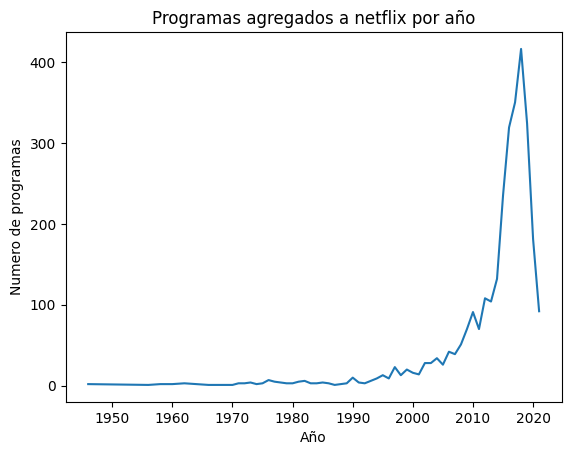

In [68]:

##podemos evaluar el numero de programas publicados por año
df3 = df2.groupby(["Anho publicado"])["ID Show"].count().reset_index()



###ponemos que columnas  va agarrar, que es el año publicado y el id del show
plt.plot(df3["Anho publicado"],df3["ID Show"])
##titulo que va a tener nuestra grafica
plt.title("Programas agregados a netflix por año")
##label de x
plt.xlabel("Año")
##label del año Y
plt.ylabel("Numero de programas")
plt.show()



In [66]:
##se observa que en el año 2020, la tendencia cae versus al año 2019 y venia en crecimiento, entonces se va evaluar a que se debe
####reviamos cuales son las fechas mas recientes de programas agregados
df2["Fecha agregado"].sort_values(ascending= False).value_counts()

Fecha agregado
December 31, 2019     66
March 1, 2018         58
October 1, 2018       46
January 1, 2020       45
November 1, 2018      35
                      ..
June 2, 2019           1
June 18, 2019          1
June 18, 2016          1
June 16, 2019          1
 December 15, 2018     1
Name: count, Length: 964, dtype: int64

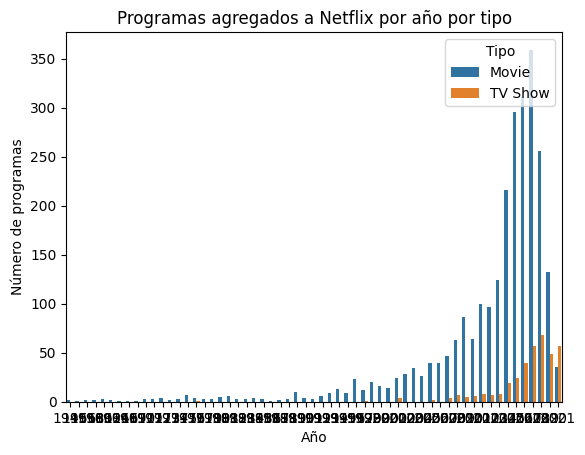

In [71]:
###se observa que la ultima fecha agregada es el 1 de enero del 2020, se debe de consideerar este hecho en el analisis

df3 = df2.groupby(["Anho publicado","Tipo"])["ID Show"].count().reset_index()

sns.barplot(x="Anho publicado",y="ID Show",hue="Tipo",data=df3)
plt.title("Programas agregados a Netflix por año por tipo")
plt.xlabel("Año")
plt.ylabel("Número de programas")
plt.show()

In [ ]:
###Observamos que las peliculas con los principales programas que ofrece netflix con mucha mayor medida contra la series, auque ellas continuan con el crecimientos en numero

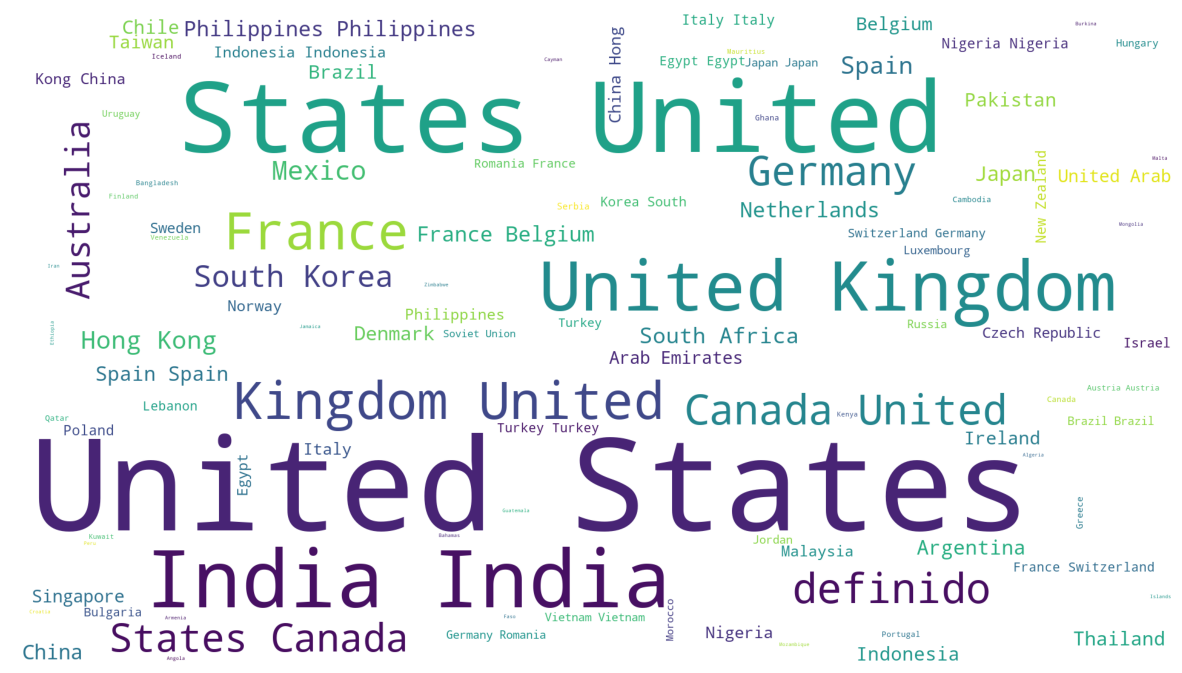

In [72]:
##observamos tambien un nuevo tipo de visualizacion, nube de palabras para vizualizar

###para esto usaremos una libreria de wordCloud
from wordcloud import WordCloud

plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color="white",width=1920,height=1080).generate(" ".join(df2["Pais"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("paises.png")
plt.show()

##Generamos una imagen donde se muesta cuales son los paises que con mas contenido de la plataforma

  

In [73]:
df["duration"].unique()
##ahora accedemos a la medida de duracion

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [75]:
##creamos una columna adicional para separarlos por tipo de valores, ya sea por minutos o temporadas

df2["Duracion_min"] = df2["Duracion"].replace([" min"," Seasons"," Season"],"",regex=True).astype(int)

df2.head(2)

,ID Show,Tipo,Titulo,Director,Actores,Pais,Fecha agregado,Anho publicado,Tipo publico,Duracion,Genero_Netflix,Descripcion,Anho lanzamiento,Rating,Genero_IMDB,Duracion_min
0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No definido,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2003,2.4,Horror,1
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1993,6.9,Drama,125


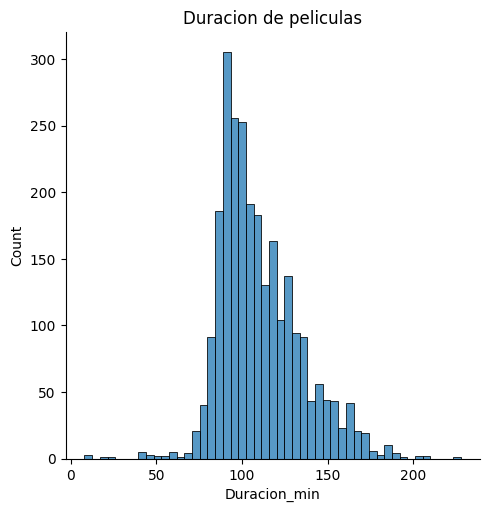

In [78]:
###Ahora evaluamos por separado la duracion de peliculas y series debido a su naturaleza
##visualizamos primero la distrubucion de duracion de peliculas


##ponemos que nos recupere los contenidos que sean de tipo pelicula
df3 = df2[df2["Tipo"] == "Movie"]
##poremos que nos devuelva los contenidos de las peliculas que tengan en formato de minutos
sns.displot(df3["Duracion_min"])
##titulo como duracion de peliculas
plt.title("Duracion de peliculas")
##imprimimos la grafica
plt.show()

In [79]:
###complemetanmos con la visualizacion de sus estadisiticas
df3["Duracion_min"].describe()

###al imprimir, podemos ver que la duracion media de todas las peliculas es de 110

count    2592.000000
mean      110.274691
std        23.945216
min         8.000000
25%        93.000000
50%       105.000000
75%       124.000000
max       228.000000
Name: Duracion_min, dtype: float64

C:\Users\soulb\AppData\Local\Temp\ipykernel_5644\2111200846.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




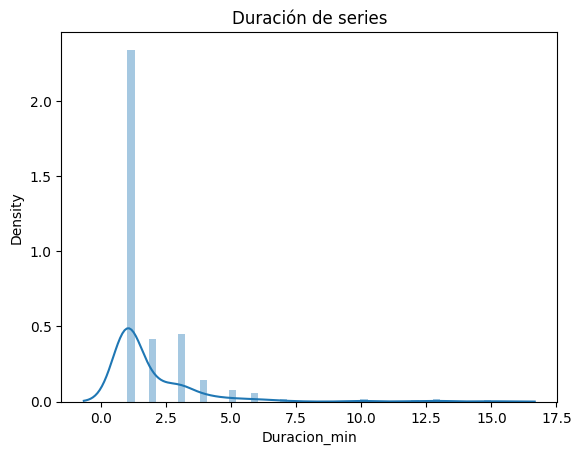

In [85]:
###ahora vemos la distribucion de duracion de series en numero de temporadas
df3 = df2[df2["Tipo"]=="TV Show"]

sns.distplot(df3["Duracion_min"])
plt.title("Duración de series")
plt.show()

In [110]:
df3["Duracion_min"].describe()

count    366.000000
mean       1.877049
std        1.811279
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       15.000000
Name: Duracion_min, dtype: float64

In [120]:
##el maximo total de serie en temporadas es de 15

###en esta consulta, ponemos que nos busque el tipo que sea un show de tv y nos buque el titulo segun la duracion sea de 15
df2.loc[(df2["Duracion_min"] == 15) & (df2["Tipo"]=="TV Show"),"Titulo"]

656    Supernatural
Name: Titulo, dtype: object

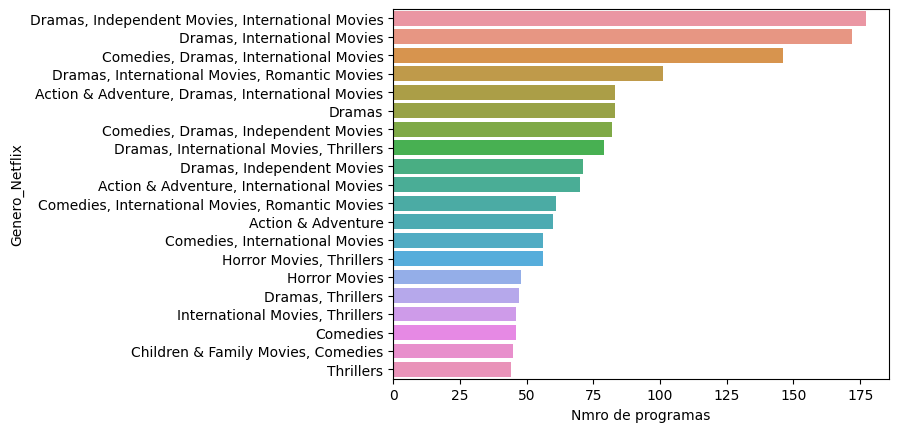

In [124]:
##ahora vemos tambien las categorias que pertenecen el contenido
df3  = df2.groupby(["Genero_Netflix"])["ID Show"].count().reset_index()

###ordenamos de mayor a menor
df3 = df3.sort_values("ID Show",ascending=False)

sns.barplot(x="ID Show",y="Genero_Netflix",data=df3[0:20])
plt.xlabel("Numero de programas")
##Imprimimos los resultados
plt.show()

##con este script vemos  de lado el genero del contenido de netflix y de otro lado en la grafica la cantidad de programas que existen por genero de netflix

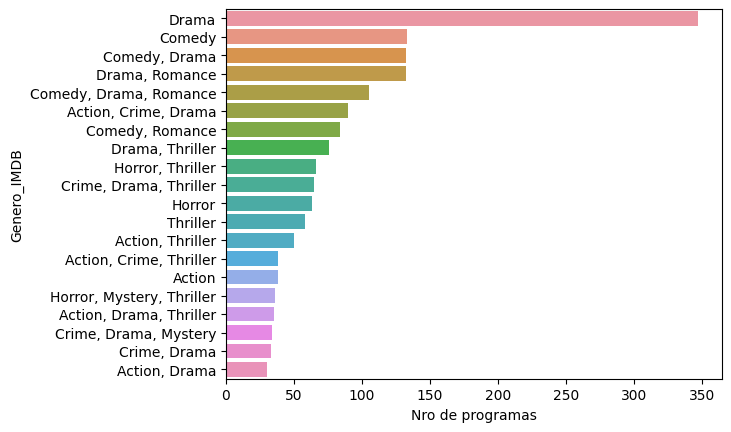

In [127]:
###ahora veremos a que categoria pertenece el contenido

df3 = df2.groupby(["Genero_IMDB"])["ID Show"].count().reset_index()

##Los ordenamos de mayor a menor
df3 = df3.sort_values("ID Show",ascending=False)

sns.barplot(x="ID Show",y="Genero_IMDB",data=df3[0:20])
plt.xlabel("Nro de programas")
plt.show()

##Se imprime el genero del cual pertenece cada contenido

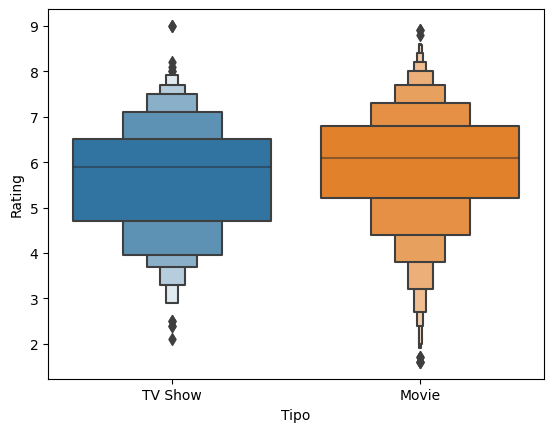

In [128]:
##Ahora vemos la distribucion de ratings en un box plot segun el tipo

sns.boxenplot(x="Tipo",y="Rating",data=df2)
plt.show()

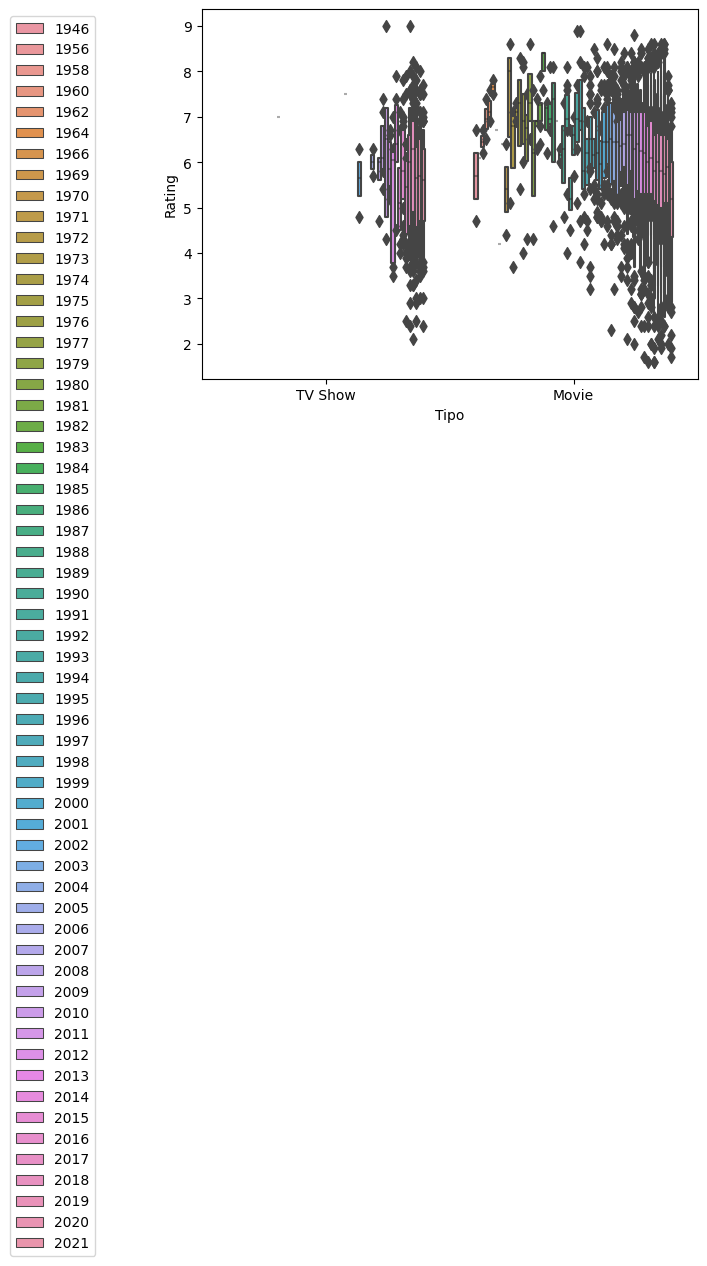

In [130]:
##Ahora vemos la distribucion de ratings en un box plot segun el tipo


sns.boxenplot(x="Tipo",y="Rating",hue="Anho publicado",data=df2)
plt.legend(bbox_to_anchor=(-0.2, 1),loc="upper right")
plt.show()

In [131]:
##Para resolver las preguntas de negocio debemos empezar entendiendo el contexto 
# de la situación, luego entendemos la data y preparamos para luego proceder a realizar 
# el análisis.

### Entonces, ¿qué preguntas podríamos querer resolver?

##Veremos el caso de qué tipo de programas es el que más gustó al 
# público para evaluar si se puede reaplicar en nuevos planes.

In [132]:
##veamos que programas tienen mejor rating
df3 = df2.groupby(["Titulo"])["Rating"].mean().reset_index()

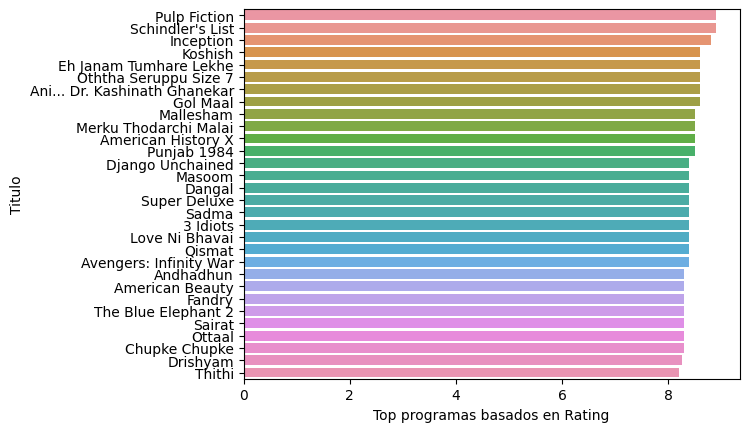

In [137]:
###Los Ordenamos de mayor a menor
df3 = df3.sort_values("Rating",ascending=False)

###con el arreglo le damos el rango de cuantos queremos nos traiga de datos
sns.barplot(x="Rating",y="Titulo",data=df3[0:30])
plt.xlabel("Top programas basados en Rating")
plt.show()

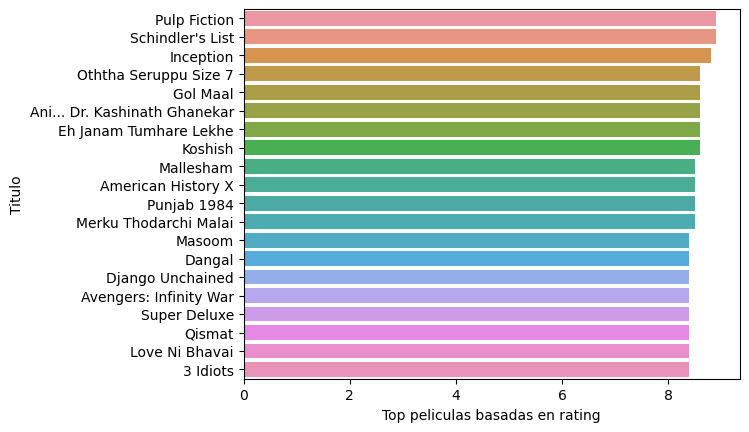

In [138]:
##Vemos que peliculas tiene mayor rating
df3 = df2[df2["Tipo"]=="Movie"]
df3 = df3.groupby(["Titulo"])["Rating"].mean().reset_index()

###Los ordenamos de mayor a menor 
df3 = df3.sort_values("Rating",ascending=False)


sns.barplot(x="Rating",y="Titulo",data=df3[0:20])
plt.xlabel("Top peliculas basadas en rating")
plt.show()

In [141]:
##Que pelicula tiene mejor rating

df2[df2["Titulo"] == "Pulp Fiction"]

,ID Show,Tipo,Titulo,Director,Actores,Pais,Fecha agregado,Anho publicado,Tipo publico,Duracion,Genero_Netflix,Descripcion,Anho lanzamiento,Rating,Genero_IMDB,Duracion_min
2543,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,1994,8.9,"Crime, Drama",154


<function matplotlib.pyplot.show(close=None, block=None)>

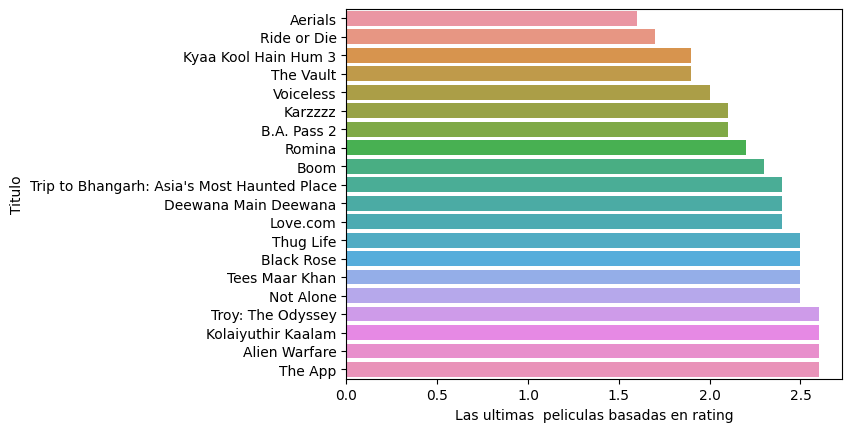

In [143]:
##Veamos que peliculas tienen menor rating

df3 = df2[df2["Tipo"]=="Movie"]
df3 = df3.groupby(["Titulo"])["Rating"].mean().reset_index()


##Los ordenamos de mayor a menor
df3 = df3.sort_values("Rating",ascending=True)

sns.barplot(x="Rating",y="Titulo",data=df3[0:20])
plt.xlabel("Las ultimas  peliculas basadas en rating")
plt.show

In [144]:
##Que pelicula tiene menor rating

df2[df2["Titulo"] == "Aerials"]

,ID Show,Tipo,Titulo,Director,Actores,Pais,Fecha agregado,Anho publicado,Tipo publico,Duracion,Genero_Netflix,Descripcion,Anho lanzamiento,Rating,Genero_IMDB,Duracion_min
695,s2556,Movie,Aerials,S.A. Zaidi,"Saga Alyasery, Ana Druzhynina, Mansour Al Fele...",United Arab Emirates,"May 7, 2020",2016,TV-14,90 min,"International Movies, Sci-Fi & Fantasy",Dubai residents struggle to figure out why a f...,2016,1.6,"Drama, Sci-Fi, Thriller",90


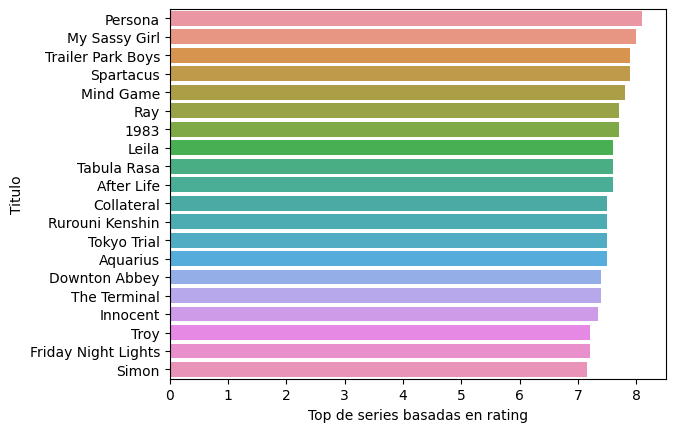

In [145]:
##veamos que series tienen mayor rating
df3  =df2[df2["Tipo"] == "TV Show"]
df3 = df3.groupby(["Titulo"])["Rating"].mean().reset_index()


##ordenamos de mayor a menor

df3 = df3.sort_values("Rating",ascending=False)

sns.barplot(x="Rating",y="Titulo",data=df3[0:20])
plt.xlabel("Top de series basadas en rating")
plt.show()

In [147]:
###Que serie tiene mayor rating

df2[df2["Titulo"] == "Persona"]

,ID Show,Tipo,Titulo,Director,Actores,Pais,Fecha agregado,Anho publicado,Tipo publico,Duracion,Genero_Netflix,Descripcion,Anho lanzamiento,Rating,Genero_IMDB,Duracion_min
1116,s3929,TV Show,Persona,"Lee Kyoungmi, Yim Pilsung, Jeon Go-woon, Kim J...","Lee Ji-eun (IU), Bae Doona, Park Hae Soo, Kim ...",South Korea,"April 11, 2019",2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr...",An exploration of different personas in an ecl...,1966,8.1,"Drama, Thriller",1


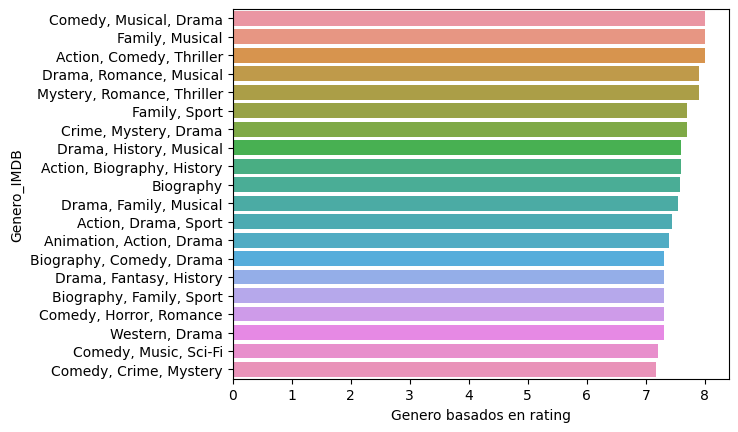

In [149]:
##Ver que generos tienen mas rating


df3 = df2.groupby(["Genero_IMDB"])["Rating"].mean().reset_index()
df3 = df3.sort_values("Rating",ascending=False)

sns.barplot(x="Rating",y="Genero_IMDB",data=df3[0:20])
plt.xlabel("Genero basados en rating")
plt.show()

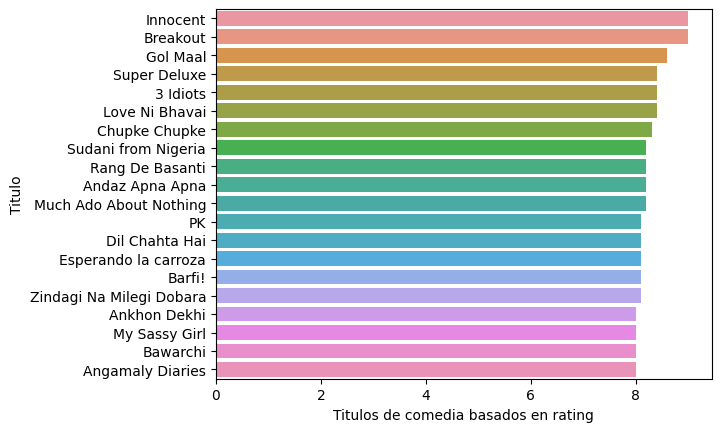

In [150]:
###vemos que peliculas tienen genero del mayor rating


df3 = df2[df2["Genero_IMDB"].str.contains("Comedy")]
df3 = df3.groupby(["Titulo"])["Rating"].mean().reset_index()


##Las ordenes de mayor a menor

df3 = df3.sort_values("Rating",ascending=False)


sns.barplot(x="Rating",y="Titulo",data=df3[0:20])
plt.xlabel("Titulos de comedia basados en rating")
plt.show()

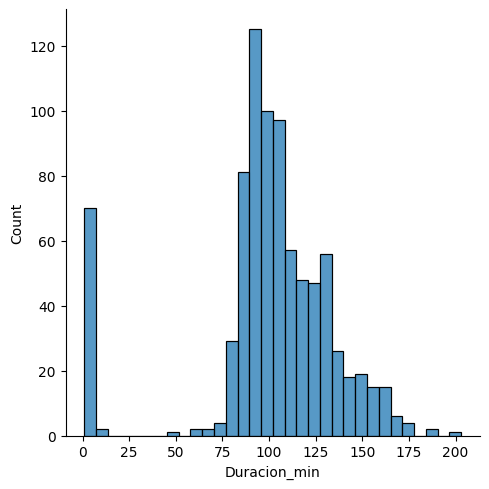

In [151]:
##Duracion de las peliculas de comedia


df3 = df2[df2["Genero_IMDB"].str.contains("Comedy")]
sns.displot(df3["Duracion_min"])
plt.show()

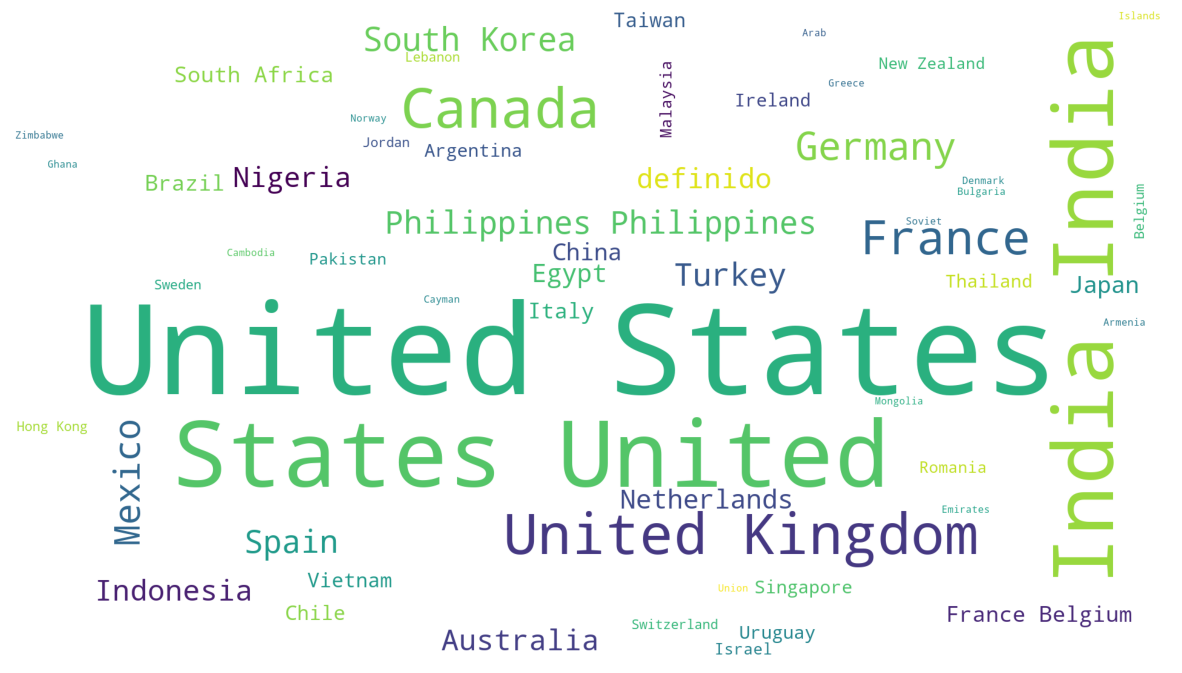

In [154]:
#Veamos en qué países se realizaron estos programas



plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df3["Pais"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('paises2.png')
plt.show()